In [49]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

CLEANING OF THE DATA 



In [50]:
df = pd.read_csv("Diwali_Sales.csv",encoding='unicode_escape') #using encoding as error occurred 

In [51]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [52]:
df.shape

(11251, 15)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [54]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [55]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [56]:
df.dropna(inplace=True)

In [57]:
df.shape

(11239, 13)

In [58]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

In [59]:
df['Amount']=df['Amount'].astype(int)

In [60]:
df.dtypes

User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int64
dtype: object

In [61]:
df.rename(columns={"Marital_Status":"is_Maried"})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,is_Maried,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [62]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


EXPLORATORY DATA ANALYSIS

1.gender


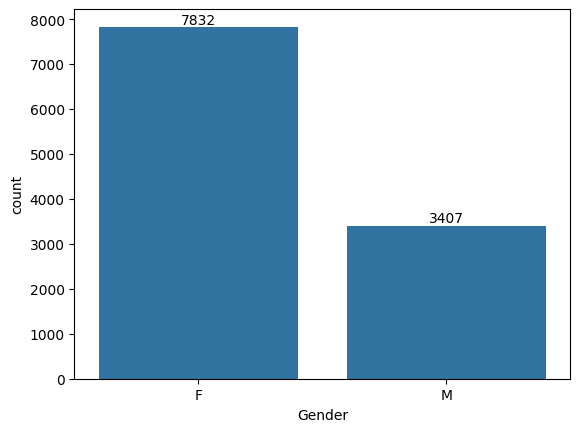

In [63]:
ax = sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [64]:
sales_gen= df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(['Amount'],ascending=False)

<Axes: xlabel='Gender', ylabel='Amount'>

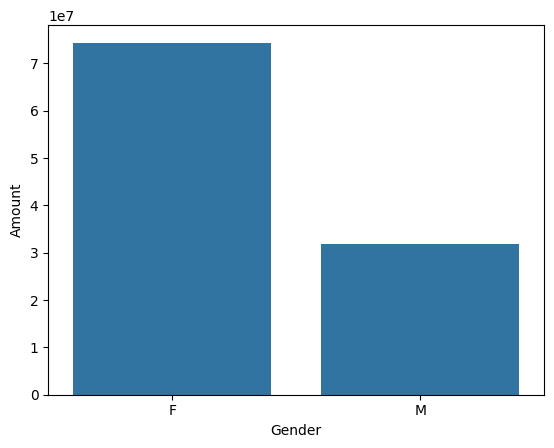

In [65]:
sns.barplot(x='Gender',y="Amount",data=sales_gen)

THE MOST NUMBER OF ORDERS ARE DONE BY FEMALE 
AND FEMALES HAVE HIGHER PURCHASING POWER 

2.age group

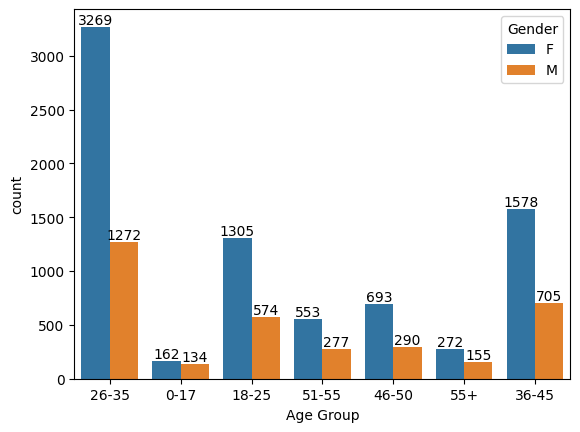

In [66]:
ax = sns.countplot(x='Age Group',data=df,hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

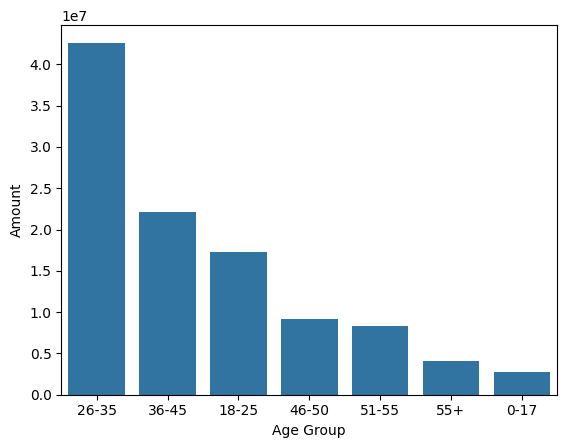

In [67]:
sales_gen=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_gen)

most orders and amount spent is by females of age group 26-35

3.state

In [68]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


<Axes: xlabel='State', ylabel='Orders'>

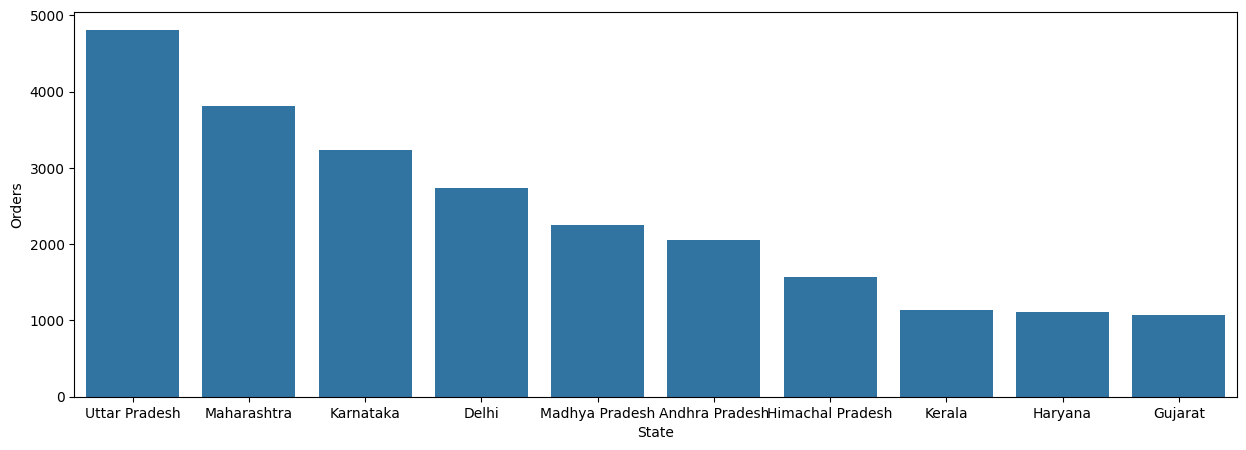

In [69]:
plt.figure(figsize=(15,5))
sales_gen = df.groupby(['State'],as_index=False).sum().sort_values('Orders',ascending=False).head(10)
sns.barplot(x='State',y='Orders',data=sales_gen)




<Axes: xlabel='State', ylabel='Amount'>

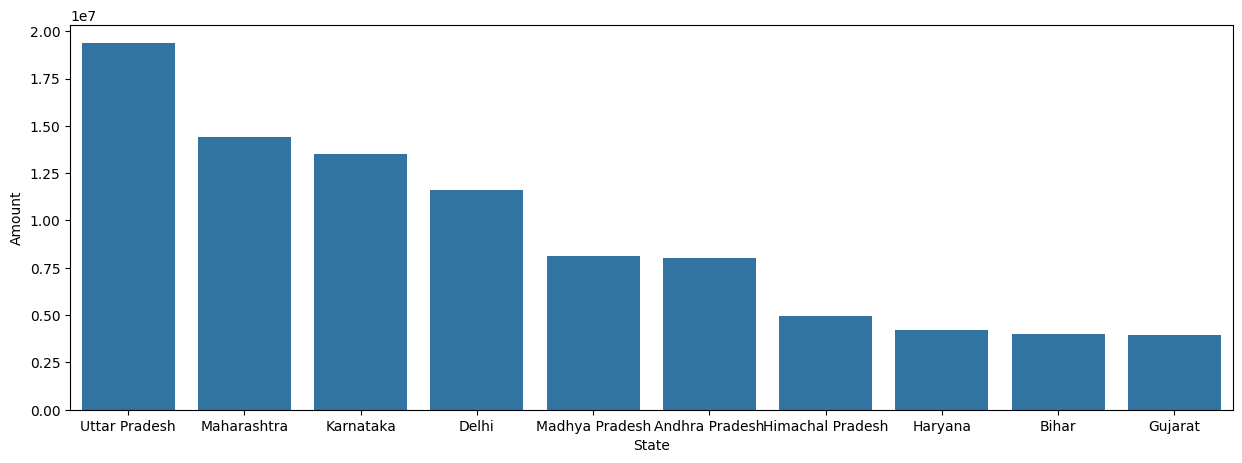

In [70]:
plt.figure(figsize=(15,5))
sales_gen=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False).head(10)
sns.barplot(x='State',y='Amount',data=sales_gen)

From the above graph we can see that the total number of orders and total amount spent is greater in Uttar Pradesh , Maharashtra .Karnataka respectively

4.marital status

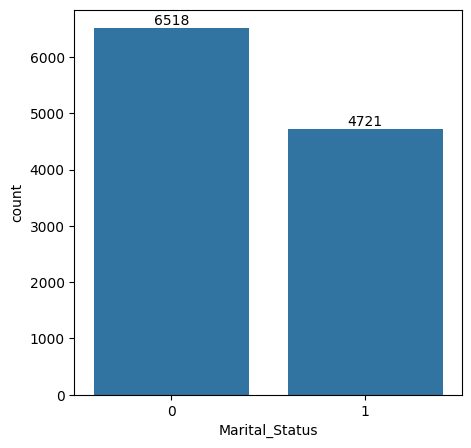

In [76]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='Marital_Status',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [81]:
sales_gen= df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

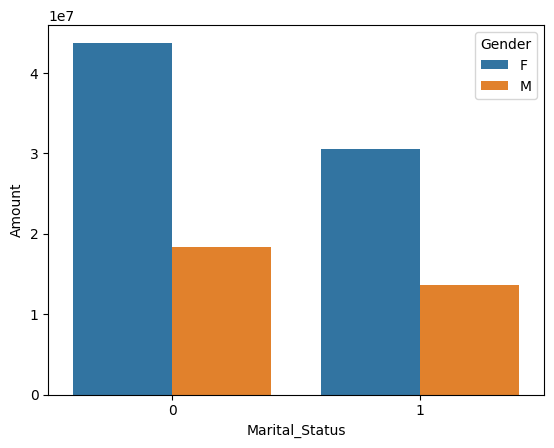

In [82]:
sns.barplot(x='Marital_Status',y='Amount',data=sales_gen,hue='Gender')

from the above graph we can see that most of the buyers are married women and they also have more purchasing power

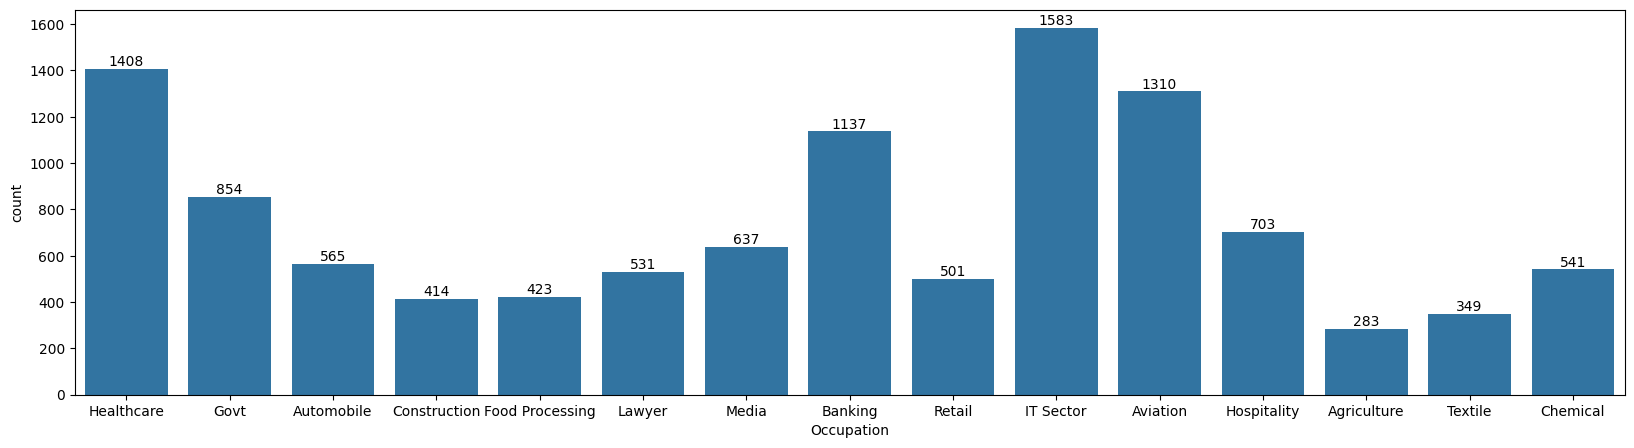

In [85]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='Occupation' ,data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [86]:
sales_gen= df.groupby('Occupation',as_index=False)['Amount'].sum().sort_values("Amount",ascending=False)

<Axes: xlabel='Occupation', ylabel='Amount'>

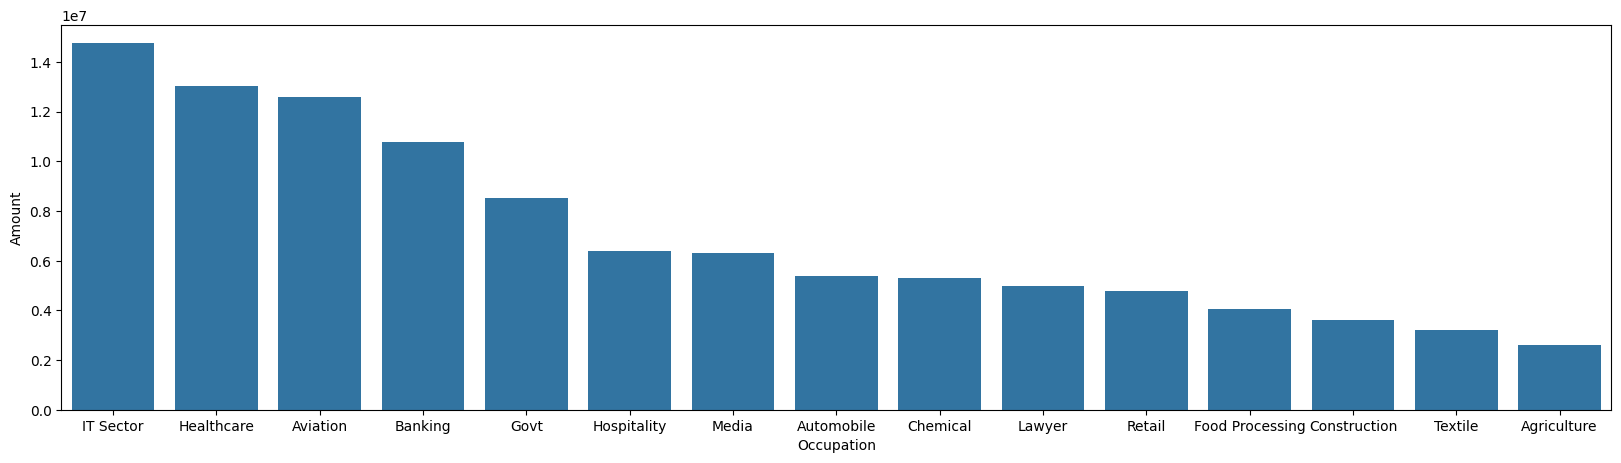

In [88]:
plt.figure(figsize=(20,5))
sns.barplot(x="Occupation",y="Amount",data=sales_gen)

from the above graph we can see that most of the buyers are from the IT sector , Healthcare and Aviation sector

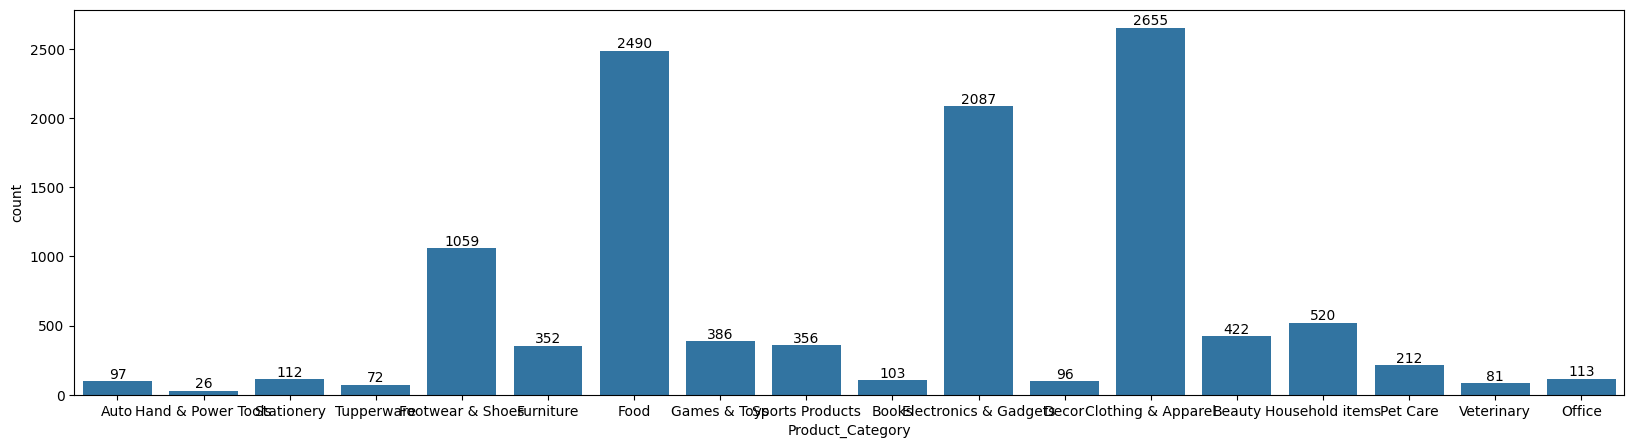

In [95]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='Product_Category',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

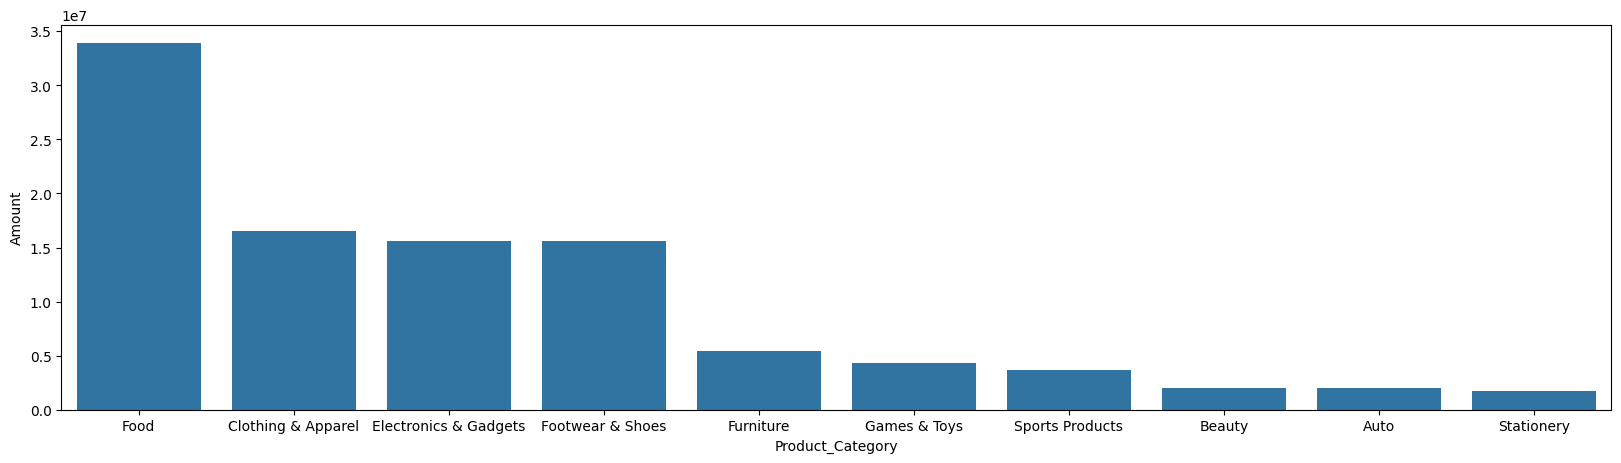

In [98]:
plt.figure(figsize=(20,5))
sales_gen= df.groupby('Product_Category',as_index=False)['Amount'].sum().sort_values("Amount",ascending=False).head(10)
sns.barplot(x='Product_Category',y='Amount',data=sales_gen)

from the above graph we can see that most of the products sold are from food,clothing ,electronics and footwear category

<Axes: xlabel='Product_ID', ylabel='Orders'>

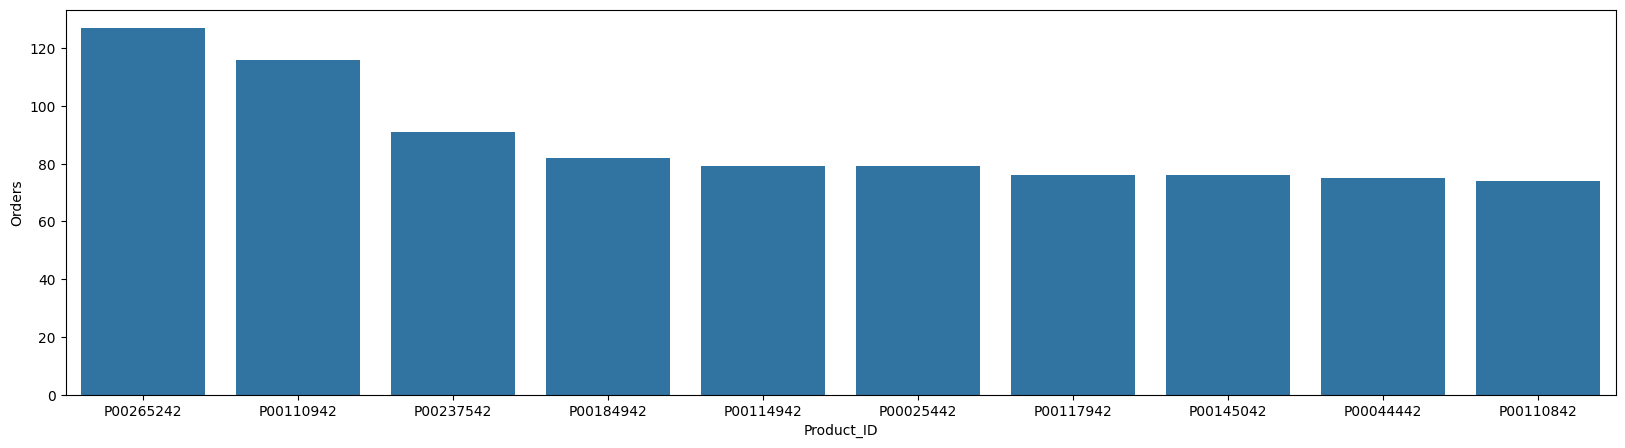

In [102]:
plt.figure(figsize=(20,5))
sales_gen= df.groupby('Product_ID',as_index=False)['Orders'].sum().sort_values("Orders",ascending=False).head(10)
sns.barplot(x='Product_ID',y='Orders',data=sales_gen)

CONCLUSION 

married women of age group 25-35 from Uttar Pradesh , Maharashtra , Karanataka working in IT , healthcare ,aviation sector are more likely to buy products from food,electronis,footwear and clothing category 